# 数据准备

## 数据预处理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
%config InlineBackend.figure_format='retina'

In [2]:
from help import read_data, data_preprocess
train, test, store = read_data()
X, y, X_predict = data_preprocess(train, test, store)
y.loc[y==0] = 10**(-100)
y.loc[:] = np.log(y)
del train, test, store

Loading train data...


//anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Loading test data...
Loading store data...
  Successfully read data as: train, test, store.

Preprocessing training data...
  Successfully preprocess training data.

Preprocessing testing data...
  Successfully preprocess testing data.



//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## 数据划分

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=520)

# 变量选择

## Lasso

In [4]:
from sklearn.linear_model import LassoCV
regr = LassoCV(cv=5,random_state=101,alphas=[0.005])
regr.fit(X_train,y_train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_test, y_test))
print("Variables Eliminated: ", sum(regr.coef_==0))
print("Variables Kept: ", sum(regr.coef_!=0))
X.columns[regr.coef_!=0]

LassoCV Best Alpha Scored:  0.005
LassoCV Model Accuracy:  0.9996231057518093
Variables Eliminated:  17
Variables Kept:  16


Index(['Month', 'Year', 'DayOfWeek', 'Open', 'CompetitionDistance',
       'CompetitionOpenTime', 'Promo', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval_Dec', 'PromoInterval_Jun',
       'PromoInterval_Mar', 'PromoInterval_Sept', 'StoreType_a',
       'Assortment_a'],
      dtype='object')

In [5]:
X_reduce = X[X.columns[regr.coef_!=0]]
X_train_reduce, X_test_reduce, y_train, y_test = train_test_split(X_reduce, y, random_state=520)

# 模型

[定义评分函数：](https://www.cnblogs.com/harvey888/p/6964741.html)

In [6]:
from help import rmspe
from sklearn.metrics import make_scorer
respe_scorer = make_scorer(rmspe, greater_is_better=False)

## 多元回归

### 线性回归*

In [7]:
from sklearn.linear_model import LinearRegression
Linear_Model = LinearRegression()

import datetime
starttime = datetime.datetime.now()
print('Fitting model...')
Linear_Model.fit(X_train, y_train)
endtime = datetime.datetime.now()
print('  Done!  \n  Using time:',(endtime - starttime).seconds,'sec\n')

Model = Linear_Model
FileName = 'Linear_Model'
from help import save_model
save_model(Model, FileName, Best_Model=False)

from help import train_test_score
train_test_score(Model, X=X, y=y)

Fitting model...
  Done!  
  Using time: 1 sec

Saving model...
  The Model have been save in  ['Model_Parameter/Linear_Model.pkl']
    PS: To load model, use command: 'Model = joblib.load(FileName)'.
  Using time: 0 sec

Calculating train score...
  Train rmspe score: 0.03993
  Using time: 0 sec

Calculating test score...
  Test rmspe score: 0.03965
  Using time: 0 sec



***

In [8]:
from sklearn.linear_model import LinearRegression
Linear_Model_reduce = LinearRegression()

import datetime
starttime = datetime.datetime.now()
print('Fitting model...')
Linear_Model_reduce.fit(X_train_reduce, y_train)
endtime = datetime.datetime.now()
print('  Done!  \n  Using time:',(endtime - starttime).seconds,'sec\n')

Model = Linear_Model_reduce
FileName = 'Linear_Model_reduce'
from help import save_model
save_model(Model, FileName, Best_Model=False)

from help import train_test_score
train_test_score(Model, X=X_reduce, y=y)

Fitting model...
  Done!  
  Using time: 0 sec

Saving model...
  The Model have been save in  ['Model_Parameter/Linear_Model_reduce.pkl']
    PS: To load model, use command: 'Model = joblib.load(FileName)'.
  Using time: 0 sec

Calculating train score...
  Train rmspe score: 0.04027
  Using time: 0 sec

Calculating test score...
  Test rmspe score: 0.03997
  Using time: 0 sec



### 多项式回归*

In [9]:
# fit model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
Ploy_Res_Model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

import datetime
starttime = datetime.datetime.now()
print('Fitting model...')
Ploy_Res_Model.fit(X_train[:10000], y_train[:10000])
endtime = datetime.datetime.now()
print('  Done!  \n  Using time:',(endtime - starttime).seconds,'sec\n')

# save model
Model = Ploy_Res_Model
FileName = 'Ploy_Res_Model'
from help import save_model
save_model(Model, FileName, Best_Model=False)

# print score
from help import train_test_score
train_test_score(Model, train_size=10000, X=X, y=y) 

Fitting model...
  Done!  
  Using time: 261 sec

Saving model...
  The Model have been save in  ['Model_Parameter/Ploy_Res_Model.pkl']
    PS: To load model, use command: 'Model = joblib.load(FileName)'.
  Using time: 0 sec

Calculating train score...
  Train rmspe score: 0.03219
  Using time: 1 sec

Calculating test score...
  Test rmspe score: 416808826.33454
  Using time: 139 sec



***

In [10]:
# fit model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
Ploy_Res_Model_reduce = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression())])

import datetime
starttime = datetime.datetime.now()
print('Fitting model...')
Ploy_Res_Model_reduce.fit(X_train_reduce[:10000], y_train[:10000])
endtime = datetime.datetime.now()
print('  Done!  \n  Using time:',(endtime - starttime).seconds,'sec\n')

# save model
Model = Ploy_Res_Model_reduce
FileName = 'Ploy_Res_Model_reduce'
from help import save_model
save_model(Model, FileName, Best_Model=False)

# print score
from help import train_test_score
train_test_score(Model, train_size=10000, X=X_reduce, y=y) 

Fitting model...
  Done!  
  Using time: 0 sec

Saving model...
  The Model have been save in  ['Model_Parameter/Ploy_Res_Model_reduce.pkl']
    PS: To load model, use command: 'Model = joblib.load(FileName)'.
  Using time: 0 sec

Calculating train score...
  Train rmspe score: 0.03772
  Using time: 0 sec

Calculating test score...
  Test rmspe score: 0.03869
  Using time: 1 sec



### 岭回归**

速度慢 但效果还行

In [11]:
from sklearn.linear_model import SGDRegressor
Ridge_Sgd_Reg = SGDRegressor(tol=-np.infty, penalty="l2", random_state=42)

import datetime
starttime = datetime.datetime.now()
print('Fitting model...')
Ridge_Sgd_Reg.fit(X_train, y_train)
endtime = datetime.datetime.now()
print('  Done!  \n  Using time:',(endtime - starttime).seconds,'sec\n')

# save model
Model = Ridge_Sgd_Reg
FileName = 'Ridge_Sgd_Reg'
from help import save_model
save_model(Model, FileName, Best_Model=False)

# print score
from help import train_test_score
train_test_score(Model, X=X, y=y) 

Fitting model...
  Done!  
  Using time: 252 sec

Saving model...
  The Model have been save in  ['Model_Parameter/Ridge_Sgd_Reg.pkl']
    PS: To load model, use command: 'Model = joblib.load(FileName)'.
  Using time: 0 sec

Calculating train score...
  Train rmspe score: 0.04026
  Using time: 0 sec

Calculating test score...
  Test rmspe score: 0.03997
  Using time: 0 sec



***

In [12]:
from sklearn.linear_model import SGDRegressor
Ridge_Sgd_Reg_reduce = SGDRegressor(tol=-np.infty, penalty="l2", random_state=42)

import datetime
starttime = datetime.datetime.now()
print('Fitting model...')
Ridge_Sgd_Reg_reduce.fit(X_train_reduce, y_train)
endtime = datetime.datetime.now()
print('  Done!  \n  Using time:',(endtime - starttime).seconds,'sec\n')

# save model
Model = Ridge_Sgd_Reg_reduce
FileName = 'Ridge_Sgd_Reg_reduce'
from help import save_model
save_model(Model, FileName, Best_Model=False)

# print score
from help import train_test_score
train_test_score(Model, X=X_reduce, y=y) 

Fitting model...
  Done!  
  Using time: 189 sec

Saving model...
  The Model have been save in  ['Model_Parameter/Ridge_Sgd_Reg_reduce.pkl']
    PS: To load model, use command: 'Model = joblib.load(FileName)'.
  Using time: 0 sec

Calculating train score...
  Train rmspe score: 0.0403
  Using time: 0 sec

Calculating test score...
  Test rmspe score: 0.04
  Using time: 0 sec



## SVR

### LinearSVR*

In [13]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
parameters = {'C': [1,10,20,30,40,50],
              'epsilon': [0,1,2,3,4],}

Linear_SVR_grid_search = GridSearchCV(LinearSVR(max_iter=10000), parameters, cv=5, 
                                      n_jobs=-1, return_train_score=True,
                                     scoring=respe_scorer)

import datetime
starttime = datetime.datetime.now()
print('Fitting model...')
Linear_SVR_grid_search.fit(X_train[:10000], y_train[:10000])
endtime = datetime.datetime.now()
print('  Done!  \n  Using time:',(endtime - starttime).seconds,'sec\n')

# save model
Model = Linear_SVR_grid_search
FileName = 'Linear_SVR_grid_search'
from help import save_model
save_model(Model, FileName)

# print score
from help import train_test_score
train_test_score(Model, X=X, y=y) 

Fitting model...


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


  Done!  
  Using time: 120 sec

Saving model...
  The Model have been save in  ['Model_Parameter/Linear_SVR_grid_search.pkl']
    PS: To load model, use command: 'Model = joblib.load(FileName)'.
  Using time: 0 sec

  Model_Parameter/Linear_SVR_grid_search.pkl.best_estimator_:
    LinearSVR(C=20, dual=True, epsilon=0, fit_intercept=True, intercept_scaling=1.0,
          loss='epsilon_insensitive', max_iter=10000, random_state=None,
          tol=0.0001, verbose=0) 

Calculating train score...
  Train rmspe score: 0.04111
  Using time: 0 sec

Calculating test score...
  Test rmspe score: 0.0408
  Using time: 0 sec



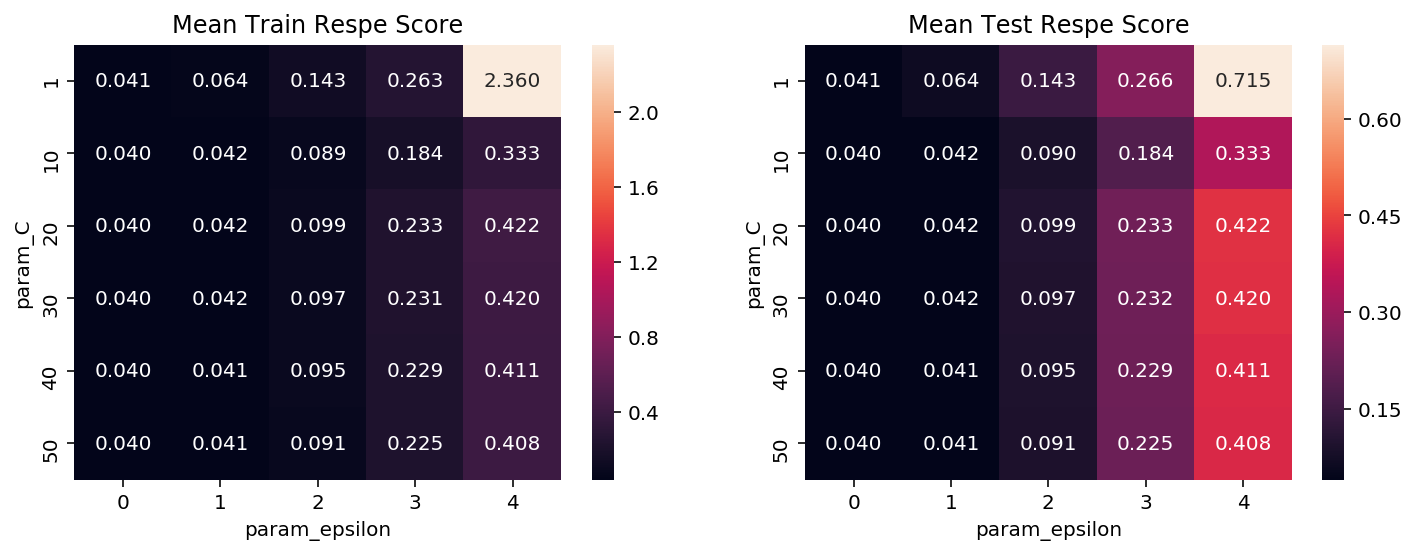

In [14]:
from help import visual_result
visual_result(Model, ['param_'+i for i in list(parameters.keys())], same_axis=False)

***

In [15]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
# parameters = {'C': [1,20,40,60],
#               'epsilon': [0.75,1,1.25],}
parameters = {'C': [1,10,20,30,40,50],
              'epsilon': [0,1,2,3,4],}

Linear_SVR_grid_search_reduce = GridSearchCV(LinearSVR(max_iter=10000), parameters, cv=5, 
                                             return_train_score=True, scoring=respe_scorer)

import datetime
starttime = datetime.datetime.now()
print('Fitting model...')
Linear_SVR_grid_search_reduce.fit(X_train_reduce[:10000], y_train[:10000])
endtime = datetime.datetime.now()
print('  Done!  \n  Using time:',(endtime - starttime).seconds,'sec\n')

# save model
Model = Linear_SVR_grid_search_reduce
FileName = 'Linear_SVR_grid_search_reduce'
from help import save_model
save_model(Model, FileName)

# print score
from help import train_test_score
train_test_score(Model, X=X_reduce, y=y) 

Fitting model...


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

  Done!  
  Using time: 219 sec

Saving model...
  The Model have been save in  ['Model_Parameter/Linear_SVR_grid_search_reduce.pkl']
    PS: To load model, use command: 'Model = joblib.load(FileName)'.
  Using time: 0 sec

  Model_Parameter/Linear_SVR_grid_search_reduce.pkl.best_estimator_:
    LinearSVR(C=10, dual=True, epsilon=0, fit_intercept=True, intercept_scaling=1.0,
          loss='epsilon_insensitive', max_iter=10000, random_state=None,
          tol=0.0001, verbose=0) 

Calculating train score...
  Train rmspe score: 0.04133
  Using time: 0 sec

Calculating test score...
  Test rmspe score: 0.04099
  Using time: 0 sec



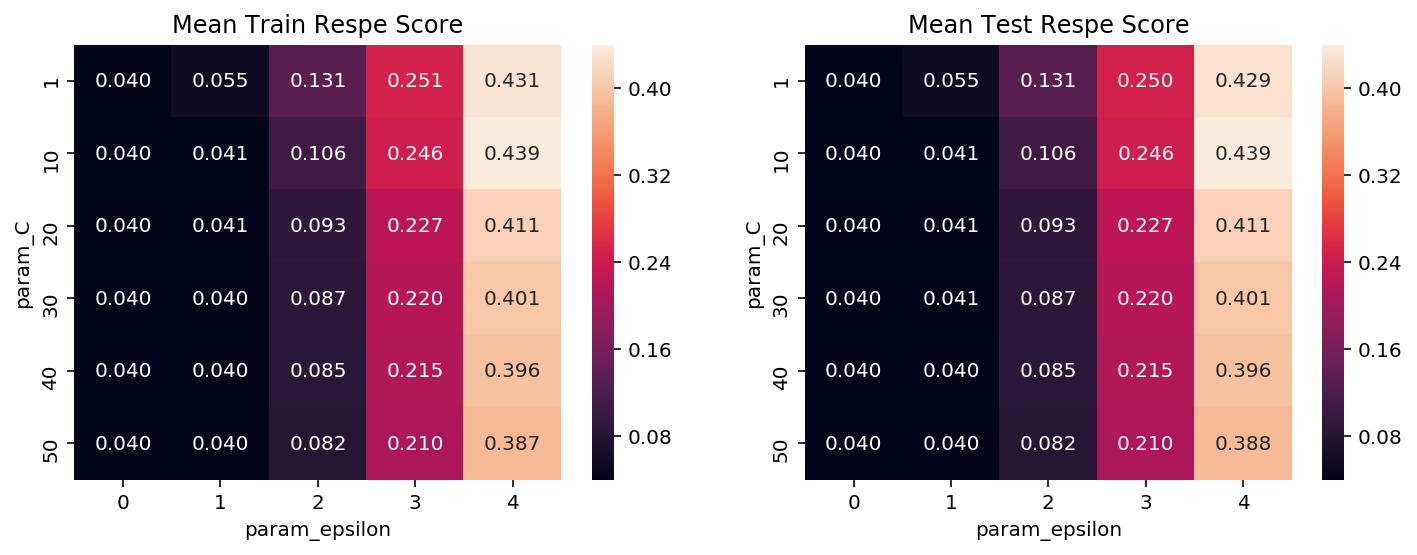

In [16]:
from help import visual_result
visual_result(Model, ['param_'+i for i in list(parameters.keys())], same_axis=False)

### KernelSVR

结论：都不怎么行，且速度慢

In [17]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel':['rbf', 'poly'],
              'epsilon': [0,1,10,100],
              'degree': [1,2,3],}

Kernel_SVR_grid_search = GridSearchCV(SVR(C=1,gamma='auto',max_iter=-1),
                               param_grid, cv=5, n_jobs=-1, 
                               return_train_score=True,
                               scoring=respe_scorer)

import datetime
starttime = datetime.datetime.now()
print('Fitting model...')
Kernel_SVR_grid_search.fit(X_train[:6000], y_train[:6000])
endtime = datetime.datetime.now()
print('  Done!  \n  Using time:',(endtime - starttime).seconds,'sec\n')

# save model
Model = Kernel_SVR_grid_search
FileName = 'Kernel_SVR_grid_search'
from help import save_model
save_model(Model, FileName)

# print score
from help import train_test_score
train_test_score(Model, train_size=6000, X=X, y=y) 

Fitting model...
  Done!  
  Using time: 107 sec

Saving model...
  The Model have been save in  ['Model_Parameter/Kernel_SVR_grid_search.pkl']
    PS: To load model, use command: 'Model = joblib.load(FileName)'.
  Using time: 0 sec

  Model_Parameter/Kernel_SVR_grid_search.pkl.best_estimator_:
    SVR(C=1, cache_size=200, coef0=0.0, degree=1, epsilon=100, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

Calculating train score...
  Train rmspe score: 10.05811
  Using time: 0 sec

Calculating test score...
  Test rmspe score: 10.01481
  Using time: 19 sec



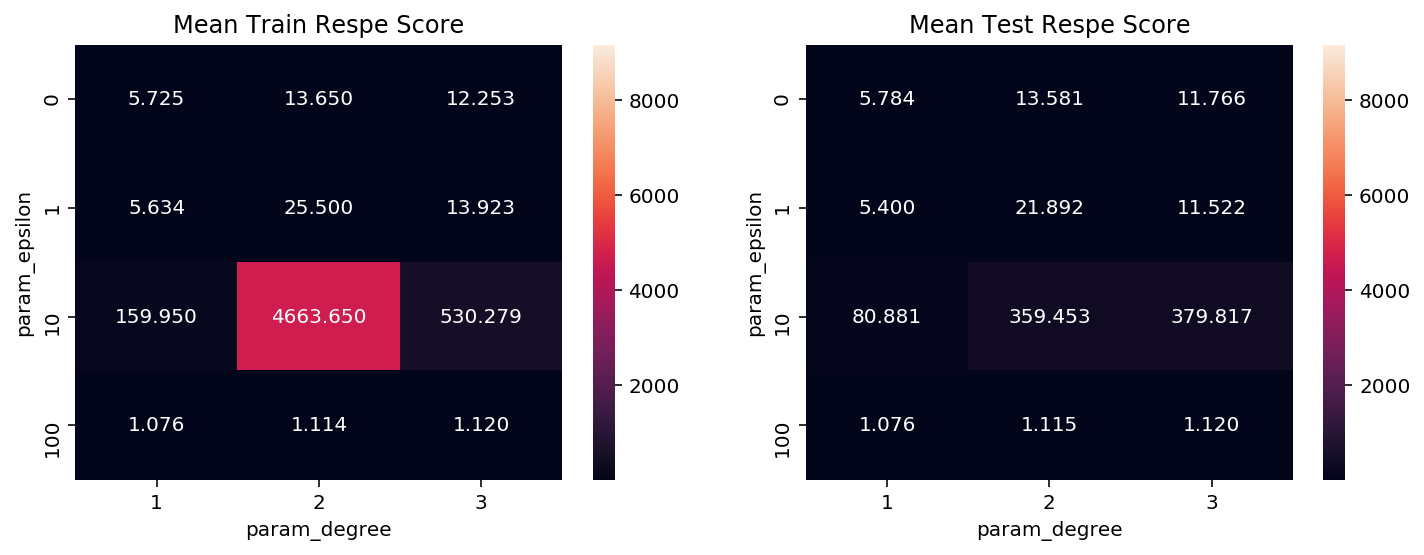

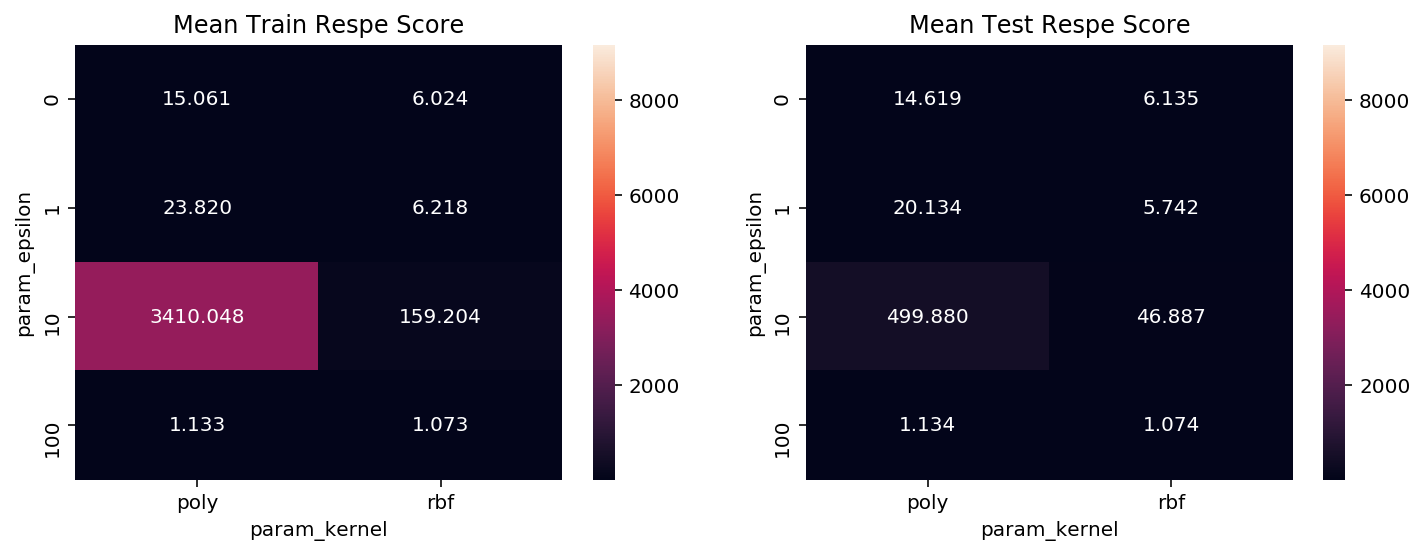

In [18]:
from help import visual_result
visual_result(Model, ['param_epsilon','param_degree'])
visual_result(Model, ['param_epsilon','param_kernel'])

***

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel':['rbf', 'poly'],
              'epsilon': [0,1,10,100],
              'degree': [1,2,3],}

Kernel_SVR_grid_search_reduce = GridSearchCV(SVR(C=1,gamma='auto',max_iter=-1),
                               param_grid, cv=5, n_jobs=-1, 
                               return_train_score=True,
                               scoring=respe_scorer)

import datetime
starttime = datetime.datetime.now()
print('Fitting model...')
Kernel_SVR_grid_search_reduce.fit(X_train_reduce[:6000], y_train[:6000])
endtime = datetime.datetime.now()
print('  Done!  \n  Using time:',(endtime - starttime).seconds,'sec\n')

# save model
Model = Kernel_SVR_grid_search_reduce
FileName = 'Kernel_SVR_grid_search_reduce'
from help import save_model
save_model(Model, FileName)

# print score
from help import train_test_score
train_test_score(Model, train_size=6000, X=X_reduce, y=y) 

Fitting model...


In [ ]:
from help import visual_result
visual_result(Model, ['param_epsilon','param_degree'])
visual_result(Model, ['param_epsilon','param_kernel'])

## [决策树](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)*

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

Tree = DecisionTreeRegressor(min_samples_leaf=4)
parameters = {'max_depth':[29,30,31,32],
              'min_samples_split':[19,20,21,22]}

Tree_grid_search = GridSearchCV(Tree, parameters, scoring=respe_scorer, 
                                cv=5, n_jobs=-1, return_train_score=True)

import datetime
starttime = datetime.datetime.now()
print('Fitting model...')
Tree_grid_search.fit(X_train[:80000], y_train[:80000])
endtime = datetime.datetime.now()
print('  Done!  \n  Using time:',(endtime - starttime).seconds,'sec\n')

from help import save_model
Model = Tree_grid_search
FileName = 'Tree_grid_search'
save_model(Model,FileName)

In [ ]:
from help import train_test_score
train_test_score(Model,X=X,y=y)

from help import visual_result
visual_result(Model, ['param_'+i for i in list(parameters.keys())],same_axis=False)

***

## KNN

sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

***

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':[1,3,5,7,9],
             'p':[1,2]}
KNN_grid_search_reduce = GridSearchCV(KNeighborsRegressor(n_jobs=-1), 
                                      parameters, scoring=respe_scorer, 
                                      cv=5, n_jobs=-1, return_train_score=True)

import datetime
starttime = datetime.datetime.now()
print('Fitting model...')
KNN_grid_search_reduce.fit(X_train_reduce[:10000], y_train[:10000])
endtime = datetime.datetime.now()
print('  Done!  \n  Using time:',(endtime - starttime).seconds,'sec\n')

from help import save_model
Model = KNN_grid_search_reduce
FileName = 'KNN_grid_search_reduce'
save_model(Model,FileName)

In [ ]:
from help import train_test_score
train_test_score(Model,X=X_reduce,y=y)

from help import visual_result
visual_result(Model, ['param_'+i for i in list(parameters.keys())],same_axis=False)